## Dataset

This notebook uses the **Wholesale Customers Data Set** from the  
UCI Machine Learning Repository.

Due to data size and licensing considerations, the dataset is not stored
in this GitHub repository.

Please download the dataset from:
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


In [1]:
# Step 1 Setup and load dadta
# Install and import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# STEP 2: Basic EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [6]:
# STEP 3: Feature Selection
# Drop categorical columns for clustering
X = df.drop(columns=["Channel", "Region"])


In [7]:
# 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# STEP 5: Elbow Method (K selection)
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


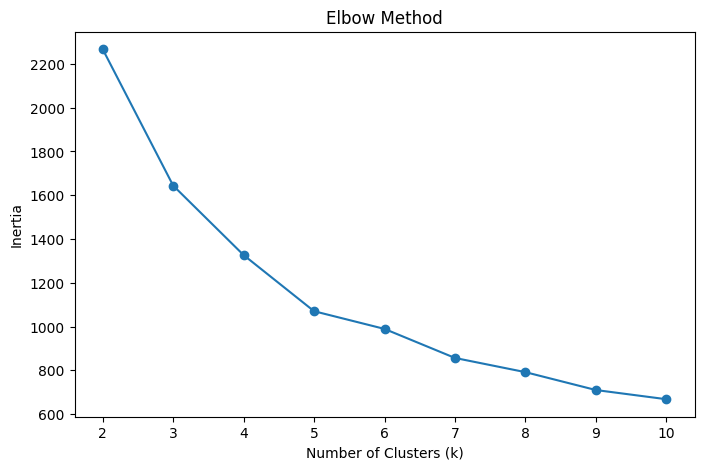

In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(2,11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


### Elbow Method Interpretation

The Elbow Method is used to determine the optimal number of clusters (K) by analyzing
the relationship between the number of clusters and the Within-Cluster Sum of Squares (WCSS).

From the Elbow Plot:
- WCSS decreases rapidly when K increases from 1 to 3.
- After K = 3, the rate of decrease becomes much slower.
- This indicates a clear "elbow" point around **K = 3**.
- However,K=5 could be considered for finer segmentation, but it introduces higher model complexity with limited performance gain.

**Conclusion:**
K = 3 provides a good balance between model simplicity and clustering performance,
making it a reasonable choice for customer segmentation in this dataset.

To further validate this selection, the Silhouette Score is evaluated in the next step.


In [10]:
# STEP 6: Silhouette Score
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.400
k=3, Silhouette Score=0.458
k=4, Silhouette Score=0.349
k=5, Silhouette Score=0.369
k=6, Silhouette Score=0.276


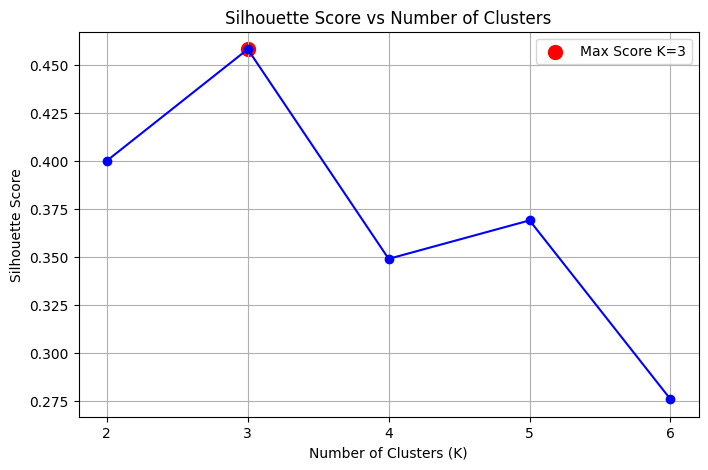

In [18]:
# K values and corresponding Silhouette Scores
k_values = [2, 3, 4, 5, 6]
sil_scores = [0.400, 0.458, 0.349, 0.369, 0.276]

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, sil_scores, marker='o', linestyle='-', color='blue')
plt.xticks(k_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)

# Highlight the max point
max_score = max(sil_scores)
max_k = k_values[sil_scores.index(max_score)]
plt.scatter(max_k, max_score, color='red', s=100, label=f"Max Score K={max_k}")
plt.legend()

# Save figure
plt.savefig("silhouette_score.png", dpi=300)
plt.show()


### Insight: Silhouette Score Evaluation

The Silhouette Score analysis indicates that **k = 3** achieves the highest score, suggesting the best balance between **cluster cohesion** and **cluster separation**.

**Key observations:**
- At **k = 3**, the model reaches its peak Silhouette Score, meaning data points are well grouped within clusters and clearly separated from other clusters.
- When increasing the number of clusters beyond 3, the Silhouette Score declines, indicating increased overlap and reduced clustering quality.
- Although k = 5 shows a slight improvement compared to k = 4, it does not surpass the performance of k = 3 and adds unnecessary complexity.

**Conclusion:**
Based on the Silhouette Score trend, **k = 3** is selected as the optimal number of clusters, providing a robust and interpretable segmentation suitable for downstream analysis and business insights.


In [11]:
# STEP 7: Train Final KMeans Model
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


In [16]:
# STEP 8: Cluster Profiling
cluster_summary = df.groupby("Cluster").mean()
cluster_summary


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,PCA1,PCA2
Cluster,,,,,,,,,,
0,1.282857,2.534286,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000,-0.413050,-0.251239
1,1.113208,2.698113,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283,0.011109,2.308962
2,2.000000,2.405405,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351,3.891320,-0.930851


## Cluster Profiling & Interpretation

The table below summarizes the **average characteristics of each customer cluster**, including spending behavior across product categories and their positions in the PCA-reduced space.

### Cluster 0 — Small & Mixed Retail Buyers
- Moderate spending across all categories
- Relatively low expenditure on **Detergents_Paper** and **Delicatessen**
- Represents **small retailers or low-volume customers**
- Located near the center of the PCA space, indicating average purchasing behavior

**Business Insight:**  
This group is price-sensitive and may respond well to **bundle promotions** or **volume discounts**.

---

### Cluster 1 — High Fresh & Frozen Buyers
- Highest spending on **Fresh** and **Frozen** products
- Moderate spending on Grocery and Milk
- Likely represents **restaurants, hotels, or food service businesses**
- Strong separation along **PCA2**, indicating distinct purchasing patterns

**Business Insight:**  
This segment benefits from **fresh supply chain optimization**, **frequent restocking**, and **long-term supplier contracts**.

---

### Cluster 2 — Grocery & Detergents Dominant Buyers
- Extremely high spending on **Grocery** and **Detergents_Paper**
- Lower Fresh and Frozen purchases compared to Cluster 1
- Channel value suggests dominance of **retail chains**
- Strong separation along **PCA1**, showing a clearly distinct customer profile

**Business Insight:**  
This group is ideal for **bulk pricing**, **logistics optimization**, and **inventory-focused strategies**.

---

### PCA Interpretation
- **PCA1** separates customers based on **Grocery & Detergents-heavy consumption**
- **PCA2** distinguishes **Fresh/Frozen intensive buyers**
- Clear separation across clusters validates the effectiveness of the clustering approach

---

### Overall Conclusion
The clustering results reveal **three distinct customer segments** with meaningful business interpretations.  
These segments can be leveraged for **targeted marketing**, **inventory planning**, and **customer-specific pricing strategies**.


In [13]:
# STEP 9: PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]


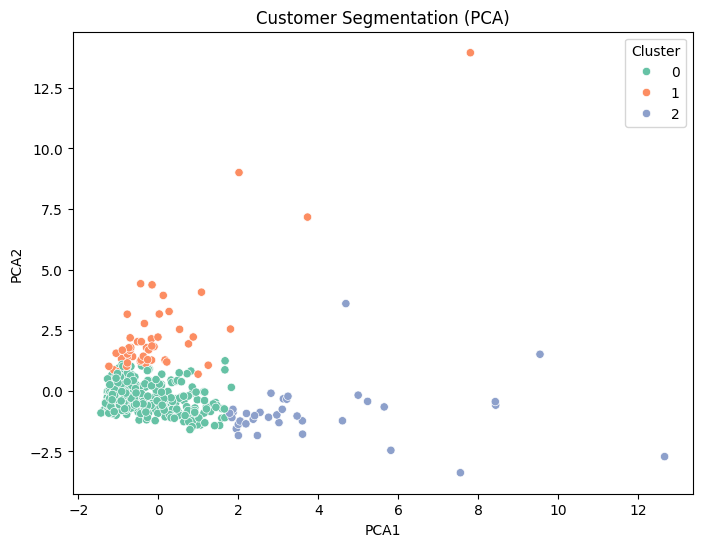

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="Set2",
    data=df
)
plt.title("Customer Segmentation (PCA)")
plt.show()


## PCA Visualization Insights

The PCA scatter plot shows the distribution of customers projected onto the first two principal components (PCA1 and PCA2), colored by cluster labels.

### Cluster Separation
- The three clusters are **clearly separated** in the PCA space, indicating that the clustering algorithm successfully identified distinct customer groups.
- **Cluster 2** is strongly separated along **PCA1**, suggesting this component captures spending patterns related to **Grocery and Detergents_Paper**.
- **Cluster 1** is mainly separated along **PCA2**, which aligns with high **Fresh and Frozen** consumption.
- **Cluster 0** is concentrated near the origin, representing customers with more balanced or lower overall spending.

### Interpretation of Principal Components
- **PCA1** primarily reflects customers with **bulk purchasing behavior** in grocery-related categories.
- **PCA2** highlights customers with **fresh and frozen product dominance**, often associated with food service businesses.
- The orthogonal separation confirms that these dimensions capture **independent purchasing behaviors**.

### Business Insight
- The clear visual separation validates the choice of **k = 3** clusters.
- Each cluster represents a **distinct customer segment** that can be targeted with tailored marketing, pricing, and inventory strategies.
- PCA visualization enhances model interpretability and helps stakeholders understand customer diversity at a glance.

### Conclusion
The PCA-based visualization confirms that customer segments are well-defined and meaningful, supporting the use of clustering results for strategic decision-making.


## Step 10: Business Interpretation of Customer Clusters

Based on the cluster profiling and PCA analysis, the three customer segments can be interpreted as follows:

### Cluster 0 – Moderate, Balanced Buyers
- Moderate spending across all product categories.
- No single category dominates consumption.
- Likely represents **small to medium retail customers** or general-purpose buyers with stable purchasing behavior.

### Cluster 1 – Fresh & Frozen Dominant Customers
- Significantly higher spending on **Fresh and Frozen** products.
- Indicates customers that prioritize perishable goods.
- Likely associated with **restaurants, cafés, or food service businesses** that require frequent fresh supplies.

### Cluster 2 – High-Volume Grocery & Detergents Buyers
- Extremely high spending on **Grocery** and **Detergents_Paper** categories.
- Represents **large-scale or bulk buyers**, such as wholesalers, supermarkets, or institutional clients.
- This segment contributes disproportionately to total revenue.

### Business Implications
- Each cluster exhibits distinct purchasing patterns, enabling **targeted marketing and pricing strategies**.
- Cluster 2 may benefit from volume discounts and long-term contracts.
- Cluster 1 may require optimized logistics and frequent restocking.
- Cluster 0 can be nurtured through promotions to increase basket size.

### Conclusion
The clustering results provide actionable insights into customer behavior and demonstrate how unsupervised learning can support data-driven business decision-making.
